In [18]:
#    This Notebook processes the data and generates the figures for this paper:
#    citation here...  
#
#    Make sure you change the the dir_name variable to match where the CompPsych directory lives on your computer. 

In [2]:
#Imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import sys
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from random import seed
from random import gauss

In [3]:
#Options
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
############################
#FIGURE 1) LOAD, SELECT, SCALE AND COMPOUND THE RELEVANT DATA
############################

#Change this dir depending on where you put the folder
dir_name = '/Users/Heisig/West/PythonNotebooks/CompPsych/'

#NW
NW = pd.read_csv(os.path.join(dir_name + "featuresNW.csv"));
featuresNW = NW[['pose_Ry_Accel_Mean','pose_Ry_Vel_Mean','gaze_Ry_Vel_Mean']];
labelNW = NW[['Subject_labels']];
x = featuresNW.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler();
x_scaled = min_max_scaler.fit_transform(x);
scaledFeaturesNW = pd.DataFrame(x_scaled,columns=featuresNW.columns);
scaledNW = pd.concat([labelNW,scaledFeaturesNW], axis=1);

#CNRU
CNRU = pd.read_csv(os.path.join(dir_name + "featuresCNRU.csv"));
featuresCNRU = CNRU[['pose_Ry_Accel_Mean','pose_Ry_Vel_Mean','gaze_Ry_Vel_Mean']];
labelCNRU = CNRU[['Subject_labels']];
x = featuresCNRU.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler();
x_scaled = min_max_scaler.fit_transform(x);
scaledFeaturesCNRU = pd.DataFrame(x_scaled,columns=featuresCNRU.columns);
scaledCNRU = pd.concat([labelCNRU,scaledFeaturesCNRU], axis=1);

#Bring in the BPRS scores
BPRSscores = pd.read_csv(os.path.join(dir_name + "BPRSscores_FORMATTED.csv")); 
totalDF = pd.merge(scaledCNRU, BPRSscores, on='Subject_labels', how='inner')


0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    6.0
17    4.0
18    2.0
19    2.0
20    2.0
21    1.0
22    1.0
23    2.0
24    2.0
25    2.0
26    3.0
27    2.0
28    2.0
29    1.0
30    6.0
31    6.0
32    3.0
33    2.0
34    1.0
35    6.0
36    4.0
37    6.0
38    3.0
39    3.0
40    2.0
41    2.0
42    1.0
43    4.0
44    4.0
45    2.0
46    1.0
47    1.0
Name: DepressiveMood, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'line'
  cset = contour_func(


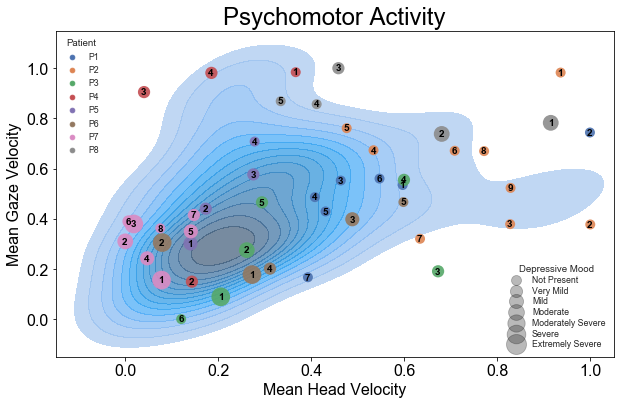

In [6]:
############################
#CREATE FIGURE 1A, KDE PLOT WITH OVERLAPPING DISTRIBUTIONS
############################

#Select sizeVar
sizeVar = round(totalDF.DepressiveMood)
hueVar = totalDF.Subject

#Select Data to Plot
xVar = totalDF.pose_Ry_Vel_Mean
#yVar = totalDF.pose_Ry_Vel_Mean
yVar = totalDF.gaze_Ry_Vel_Mean
print(sizeVar)

# Draw a combo histogram and scatterplot with density contours
fig, ax = plt.subplots(figsize=(10, 6))
#Set color theme
sns.set_theme()
sns.set_context("paper")
sns.axes_style()
#sns.set_style("darkgrid", {"axes.facecolor": ".5"})
#Plot the Northwell data as density plot
sns.kdeplot(scaledNW.pose_Ry_Vel_Mean, scaledNW.gaze_Ry_Vel_Mean,levels=15,line=False,fill=True,alpha=0.7)

#Add the scatter plot
axes = sns.scatterplot(x=xVar,y=yVar, size=sizeVar,hue=hueVar,sizes={1:100,2:150,3:200,4:250,5:300,6:350,7:400}, linewidth=0, legend=True, alpha=0.9)
#sns.set_style("darkgrid", {"axes.facecolor": ".2"})

#Create the legend
areas = (100, 150, 200, 250, 300, 350, 400);
labels = ['Not Present','Very Mild','Mild','Moderate','Moderately Severe','Severe','Extremely Severe'];
for area in range(0,len(areas)):
    plt.scatter([], [], c='k', alpha=0.3, s=areas[area], label=labels[area])              
h,l = axes.get_legend_handles_labels()
legend1 = axes.legend(h[1:int(9)],l[1:int(9)], loc='upper left',title='Patient', frameon=False)   
legend2 = ax.legend(h[int(len(h)-7):],l[int(len(h)-7):], frameon=False, labelspacing=0.2, title='Depressive Mood',loc='lower right')
axes.add_artist(legend1)

# add annotations one by one with a loop
for line in range(0,scaledCNRU.pose_Ry_Vel_Mean.size):
    label = "%d" % (BPRSscores.Session[line])
    plt.text(scaledCNRU.pose_Ry_Vel_Mean[line]-0.0006,scaledCNRU.gaze_Ry_Vel_Mean[line]-0.0105, label, horizontalalignment='center', size=10, color='black', weight='semibold')
plt.title('Psychomotor Activity',fontsize=24);
plt.xlabel('Mean Head Velocity',fontsize=16)
plt.ylabel('Mean Gaze Velocity',fontsize=16)
ax.tick_params(labelsize=16)
plt.ylim(-0.15, 1.15)
plt.xlim(-0.15, 1.05)


#Save the Plot 
plotFileName = os.path.join(dir_name + "FIG1A_Plot_Scatter_KDE.png")
plt.savefig(plotFileName,bbox_inches='tight',dpi=600) 

In [16]:
#Definitions for 1B

def plotFormants(formantFileName,plotFileName,SubjectNumber,Session):
    #Read the full formant.csv file
    formantDF = pd.read_csv(formantFileName) 
    #print(formantDF.head)
    
    #F1F2 kdeplot
    xVar = 'Formant 1 (Hz)'
    yVar = 'Formand 2 (Hz)'
    #print('F1F2 KDE')
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 6)
        
    ax = sns.kdeplot(formantDF['F1(Hz)'], formantDF['F2(Hz)'], shade=True)
    ax.collections[0].set_alpha(0)
    ax.tick_params(labelsize=20)
    plt.legend()
    plt.ylim(500, 3000)
    plt.xlim(0, 1500)
    
    plt.setp(ax.get_legend().get_texts(), fontsize=16) # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize=16) # for legend title
    
    ax.set_xlabel('Formant 1 (Hz)',fontsize=16)
    ax.set_ylabel('Formant 2 (Hz)',fontsize=16)
    
    #Find Centroid
    for path in ax.collections[-1].get_paths():
        F1, F2 = path.vertices.mean(axis=0)
        print('centroid: ',str(F1),str(F2))
    #plotTitle = "Vowel Space Density: Patient "+SubjectNumber+", Session "+Session
    plotTitle = "Patient "+SubjectNumber+", Admission"
    ax.set_title(plotTitle,fontsize=24)
    plt.show()
    
    #Output
    print('saving: ',plotFileName)
    #save plot
    fig.savefig(plotFileName,bbox_inches='tight',dpi=600)  
    plt.close(fig)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


centroid:  1140.8050805374678 2016.2589331292334


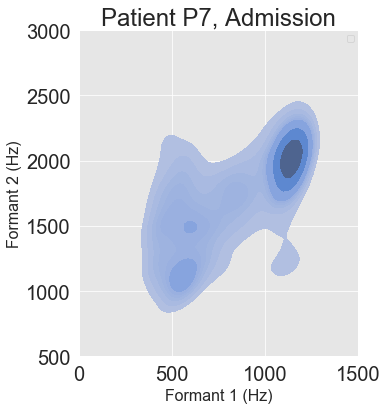

saving:  /Users/Heisig/West/PythonNotebooks/CompPsych/FIG1B_Format_Space_P7_1.png


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


centroid:  583.7810598269033 1698.0385980025258


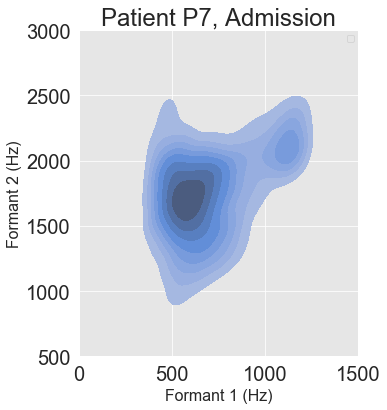

saving:  /Users/Heisig/West/PythonNotebooks/CompPsych/FIG1B_Format_Space_P7_8.png


In [17]:
    #FIGURE 1B 
    
    #Be sure that each subject's data is in it's on directory: P7_1 is patient 7, Session 1. So put their data in a folder titled accordingly. This will be important for the function described above.
   
    #Plot the Formant Space for P7-1
    formantFileName = os.path.join(dir_name + "P7_1/FormantFeat_P7_1ch1_v1.0.csv")
    plotFileName = os.path.join(dir_name + "FIG1B_Format_Space_P7_1.png") 
    plotFormants(formantFileName,plotFileName,'P7','1')
    
    #Plot the Formant Space for P7-8
    formantFileName = os.path.join(dir_name + "P7_8/FormantFeat_P7_8ch1_v1.0.csv")
    plotFileName = os.path.join(dir_name + "FIG1B_Format_Space_P7_8.png") 
    plotFormants(formantFileName,plotFileName,'P7','8')
    
    

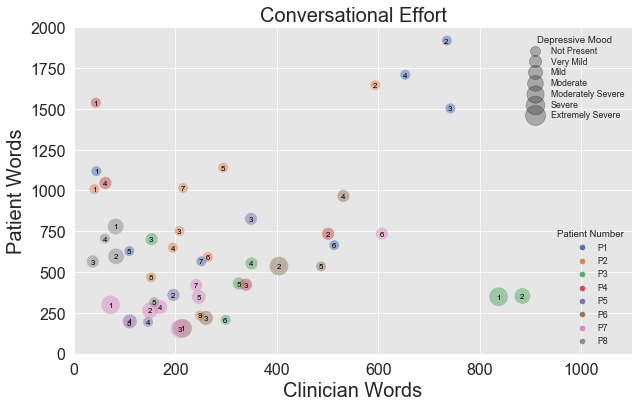

In [12]:
# FIGURE 2A: Conversational Effort

#Load Data (Assuming dir set above)
inputDataFile = os.path.join(dir_name + "googleUseDaniel_CohortDF.csv")

#Read the turns file
turnsDF = pd.read_csv(inputDataFile)  
turnsDF['SubjectSession'] = turnsDF.SubjectSession.str.replace('both_', '', regex=False)

#Read the clincial instrument scores
scoreFileName = os.path.join(dir_name + "BPRSscores_FORMATTED.csv"); 
scoresDF = pd.read_csv(scoreFileName) 

#Join the matrices on the SubjectSession Field
totalDF = pd.merge(scoresDF, turnsDF, on='Subject_labels', how='inner')

#     Choose Subjects
#All Subjects
Subjects = ['P1','P2','P3','P4','P5','P6','P7','P8']
cohort = ' All Patients'

totalDF = totalDF[totalDF['Subject'].isin(Subjects)]
totalDF = totalDF.reset_index(drop=True)


#     Create normalized features
totalDF['d_word_percent'] = totalDF['d_total_words']/(totalDF['d_total_words']+totalDF['p_total_words'])
totalDF['p_word_percent'] = totalDF['p_total_words']/(totalDF['d_total_words']+totalDF['p_total_words'])
totalDF['total_words'] = totalDF['p_total_words']+totalDF['p_total_words']
#print(totalDF)

sizeVar = round(totalDF.DepressiveMood)
hueVar = 'SubjectNumber'
#xVar = 'd_messages'
#yVar = 'p_messages'
# xVar = 'd_word_percent'
# yVar = 'p_word_percent'
xVar = 'd_total_words'
yVar = 'p_total_words'

#Begin the figure
fig = plt.gcf()
fig.set_size_inches(10, 6)
#sns.set(font_scale=1.4) # for label size
sns.set_theme()
sns.set_context("paper")
sns.axes_style()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

axes = sns.scatterplot(data=totalDF,
                     x="d_total_words",
                     y="p_total_words",
                     hue="Subject",
                     size=round(totalDF.DepressiveMood),
                     #sizes=[50, 200,350,500,1500,2500,3000],
                     sizes={1:100,2:150,3:200,4:250,5:300,6:350,7:400},
                     linewidth=0,
                     legend=True,
                     alpha=0.5)
axes.set_xlabel('Clinician Words',fontsize=20)
axes.set_ylabel('Patient Words',fontsize=20)

#Plot the subject-session ID on the circle
for lineNum in range(0,totalDF.shape[0]):
     axes.text(totalDF.loc[lineNum,xVar]-5, totalDF.loc[lineNum,yVar]-13, totalDF.Session[lineNum], horizontalalignment='left', size=8, color='black', weight='normal')
plt.xlim(0.0, np.max(totalDF.loc[:,xVar])+0.0002)
plt.ylim(0.0, np.max(totalDF.loc[:,yVar])+0.0002)


#Create the legend
areas = (100, 150, 200, 250, 300, 350,400);
labels = ['Not Present','Very Mild','Mild','Moderate','Moderately Severe','Severe','Extremely Severe'];
for area in range(0,len(areas)):
    plt.scatter([], [], c='k', alpha=0.3, s=areas[area], label=labels[area])              
h,l = axes.get_legend_handles_labels()
legend1 = axes.legend(h[1:int(9)],l[1:int(9)], loc='lower right',title='Patient Number', frameon=False)   
legend2 = axes.legend(h[int(len(h)-7):],l[int(len(h)-7):], frameon=False, labelspacing=0.2, title='Depressive Mood',loc='upper right')
axes.add_artist(legend1)

    
plt.tick_params(labelsize=16)
plt.title(cohort,fontsize=24)
plt.title('Conversational Effort',fontsize=20);
plt.xlabel('Clinician Words',fontsize=20)
plt.ylabel('Patient Words',fontsize=20)
plt.ylim(0, 2000)
plt.xlim(0, 1100)
plt.show()

#save plot
plotFileName = os.path.join(dir_name + "FIG2A_ConversationalEffort.png")
fig.savefig(plotFileName,bbox_inches='tight',dpi=600)
plt.close()

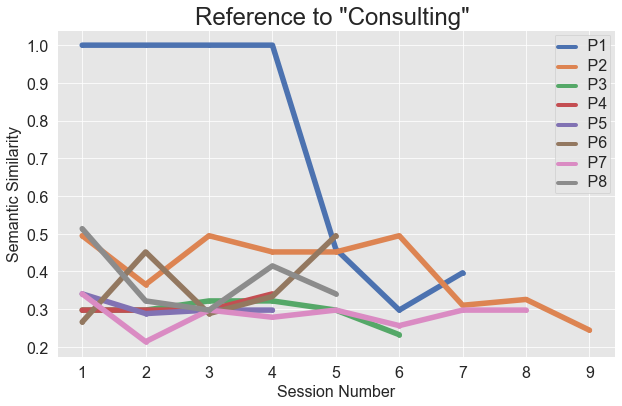

In [13]:
#FIGURE 2B

import os
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv(os.path.join(dir_name + "similarity2consulting.csv"))
 
dfM= pd.melt(df, id_vars =['patient'], value_vars =['S1','S2','S3', 'S4','S5','S6','S7','S8', 'S9']) 
 
dfM.rename(columns = {'variable':'session number'}, inplace = True)
dfM.rename(columns = {'value':'similarity'}, inplace = True)
 
sns.set(font_scale=1.4) # for label size
sns.set_theme()
sns.set_context("paper")
sns.axes_style()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

#Define the plots
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

sns.lineplot(data=dfM,
             x='session number', 
             y='similarity', 
             hue='patient',
             linewidth=5.5,
             marker = 'o', 
             markeredgewidth=0)

ax.set_xlabel('Session Number',fontsize=16)
ax.set_ylabel('Semantic Similarity',fontsize=16)
ax.tick_params(labelsize=16)
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9'])

leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(4.0)

plt.setp(ax.get_legend().get_texts(), fontsize=16) # for legend text
plt.setp(ax.get_legend().get_title(), fontsize=16) # for legend title

ax.set_title('Reference to "Consulting" ',fontsize=24)

plt.show()

#save plot
plotFileName = os.path.join(dir_name + "FIG2B_similarity2consulting.png")
fig.savefig(plotFileName,bbox_inches='tight',dpi=600)  
plt.close()